In [ ]:
import scipy.io
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal
from scipy.fft import fft, fftshift
from scipy.signal import hilbert
from scipy.signal.windows import tukey 
import numpy as np
import vectorised_hf as vhf
import h5py 
from matplotlib import colormaps as cm
from scipy.interpolate import RegularGridInterpolator
import h5loadfunc as h5
import runDASfunc as runDAS
import cv2

In [ ]:
# # Load reflection data
# ultrasound_reflection_file = 'data/ultrasound_reflection_data.mat'
# ideal_element_positions_file = 'data/ideal_element_positions.mat'
# kidney_data_file = 'data/25-01-2024-Open-UST-Kidney3-data.h5'
# # Run the DAS processing
# DAS_Image, DAS_Xp, DAS_Yp = runDAS.run_das_processing(
#     ultrasound_reflection_file, 
#     ideal_element_positions_file, 
#     kidney_data_file
# )
# # If needed, save the processed data to a file
# output_file = 'path/to/output_file.h5'
# with h5py.File(output_file, 'w') as file:
#     file.create_dataset('DAS_Image', data=DAS_Image)
#     file.create_dataset('DAS_Xp', data=DAS_Xp)
#     file.create_dataset('DAS_Yp', data=DAS_Yp)

In [64]:
# Load h5 Data
DAS_Image, Xp, Yp, Image= h5.load_h5_data('liver.h5', 'data/25-01-2024-Open-UST-Liver3-SART-07-02-2024.mat')

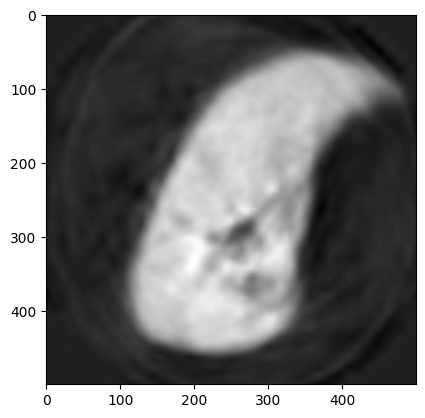

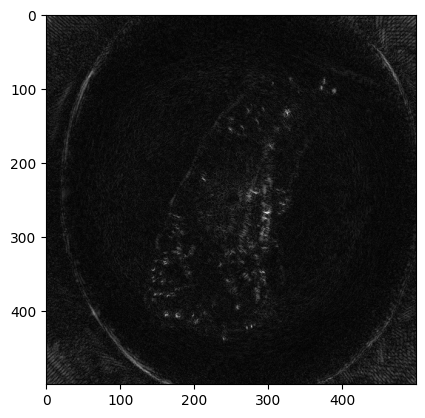

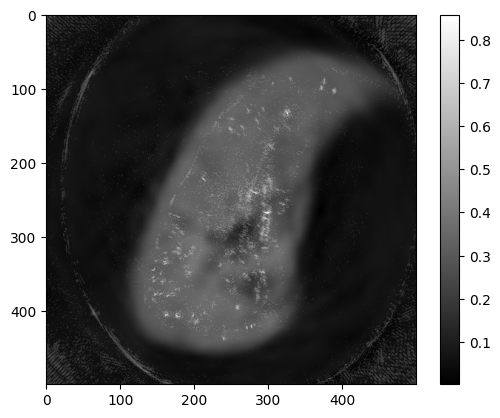

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


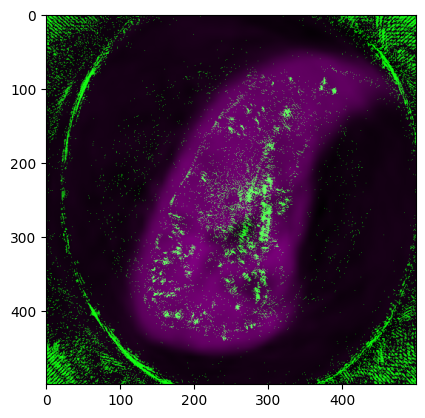

In [75]:
# Normalize both images to a 0-1 range
Image_normalized = (Image - np.min(Image)) / (np.max(Image) - np.min(Image))
das_image_normalized = (DAS_Image - np.min(DAS_Image)) / (np.max(DAS_Image) - np.min(DAS_Image))
das_image_normalized[das_image_normalized<0.125] = 0
plt.figure(1)
plt.imshow(Image, cmap='gray')
plt.figure(2)
plt.imshow(DAS_Image, cmap='gray')

# Image blend
alpha = 0.4
das_image_normalized1 = alpha * Image_normalized
Image_normalized1 = (1-alpha) * das_image_normalized
blended_image = das_image_normalized1 + Image_normalized1

# Display the blended image
plt.figure(3)
plt.imshow(blended_image, cmap='gray')
plt.colorbar()  # optional, to see the intensity scale
plt.show()



#C = cv2.merge((B,A,B))
B = Image_normalized * 0.5
A = das_image_normalized * 4
C = np.dstack((B,A,B))
# C = C[170:370, 170:370] # This is to 'zoom-in' to the picture better
#D = cv2.imshow("imfuse",C)
plt.imshow(C)
#cv2.waitKey(0)